⚫️ 課題 1
　　　パーセプトロンを用いた識別関数の学習


In [3]:
# モジュールのインポート

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 境界を可視化するための関数
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_boundary(X, model, learning_rate, epoch, offset=1, width=0.01):
    # define bounds of the domain
    min1, max1 = X[:, 0].min() - offset, X[:, 0].max() + offset
    min2, max2 = X[:, 1].min() - offset, X[:, 1].max() + offset

    # define the x and y scale
    # arange(start,end,num)等差数列の作成
    x1grid = np.arange(min1, max1, width)
    x2grid = np.arange(min2, max2, width)

    # create all of the lines and rows of the grid
    # meshgrid()格子点のプロット
    xx, yy = np.meshgrid(x1grid, x2grid)

    # flatten each grid to a vector
    # flatten 多次元配列を一次元配列に変換する
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # horizontal stack vectors to create x1,x2 input for the model
    # hstack axis=1の方向に結合する
    # axis=0:列に沿った処理
    # axis=1:行に沿った処理
    grid = np.hstack((r1, r2))

    # make predictions for the grid
    y_pred = model.predict(grid)

    # reshape the predictions back into a grid
    zz = y_pred.reshape(xx.shape)

    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap="Paired")
    plt.title(f"Learning Rate = {learning_rate} \n Epoch = {epoch}")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="cividis")
    plt.xlabel("X1", fontsize=16)
    plt.ylabel("X2", fontsize=16)

In [3]:
# パーセプトロンを用いた線形識別関数の学習


class perceptron_classifier:
    def __init__(self, learning_rate, epoch):
        self.learning_rate = learning_rate
        self.epoch = epoch

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epoch):
            errors = 0
            for i in range(n_samples):
                output = np.dot(X[i], self.weights) + self.bias
                y_pred = np.where(output > 0, 1, 0)

                if y_pred != y[i]:
                    errors += 1
                    self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                    self.bias += self.learning_rate * (y[i] - y_pred)

            if errors == 0:
                break

    def predict(self, X):
        output = np.dot(X, self.weights) + self.bias
        y_pred = np.where(output > 0, 1, 0)
        return y_pred

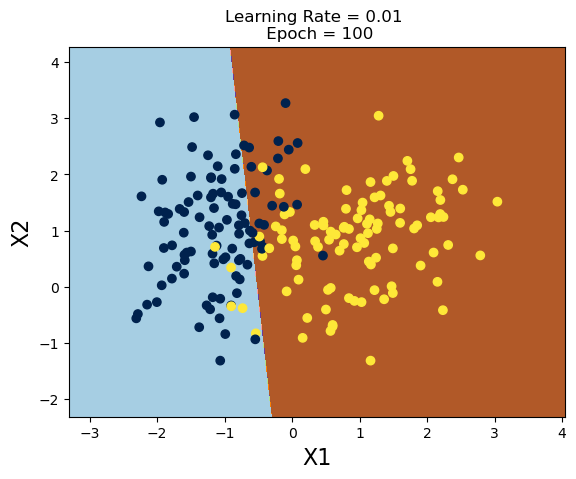

In [186]:
# make_classificationのデータセットを用いた描画
from sklearn.datasets import (
    make_classification,
)  # make_classification・・・データセットを作成

n_samp = 200
X, y = make_classification(
    n_samples=n_samp,  #  n_samples     = 生成するサンプル数
    n_features=2,  #  n_features    = 生成する特徴量の数(データセットの列数)
    n_informative=2,  #  n_informative = 目的変数のラベルと相関が強い特徴量の数
    n_redundant=0,  #  n_redundant   = Informative featureの線型結合から作られる特徴量の数
    n_clusters_per_class=1,  #  n_cluster_per_class = 1クラスあたりのクラスタ数
    random_state=15,  #  random_state  = 乱数を制御するパラメータ
)

learning_rate = 0.01
epoch = 100
model = perceptron_classifier(learning_rate, epoch)
model.fit(X, y)

plot_decision_boundary(X, model, learning_rate, epoch)

In [145]:
# パーセプトロンを用いた2次識別関数の学習


# 2次特徴量の定義
def make_quad_features(X):
    Xp = np.hstack([X[:, 0:1], X[:, 1:2]])
    Xp = np.hstack([Xp, X[:, 0:1] * X[:, 1:2]])
    Xp = np.hstack([Xp, X[:, 0:1] ** 2])
    Xp = np.hstack([Xp, X[:, 1:2] ** 2])
    return Xp


# クラスの定義
class Perceptron_Quadratic_Classifier:
    def __init__(self, learning_rate, epoch):
        self.learning_rate = learning_rate
        self.epoch = epoch

    def fit(self, X, y):
        Xp = make_quad_features(X)
        n_samples, n_features = Xp.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epoch):
            errors = 0
            for i in range(n_samples):
                output = np.dot(Xp[i], self.weights) + self.bias
                y_pred = np.where(output > 0, 1, 0)

                if y_pred != y[i]:
                    errors += 1
                    self.weights += self.learning_rate * (y[i] - y_pred) * Xp[i]
                    self.bias += self.learning_rate * (y[i] - y_pred)

            if errors == 0:
                break

    def predict(self, X):
        Xp = make_quad_features(X)
        output = np.dot(Xp, self.weights) + self.bias
        y_pred = np.where(output >= 0, 1, 0)
        return y_pred

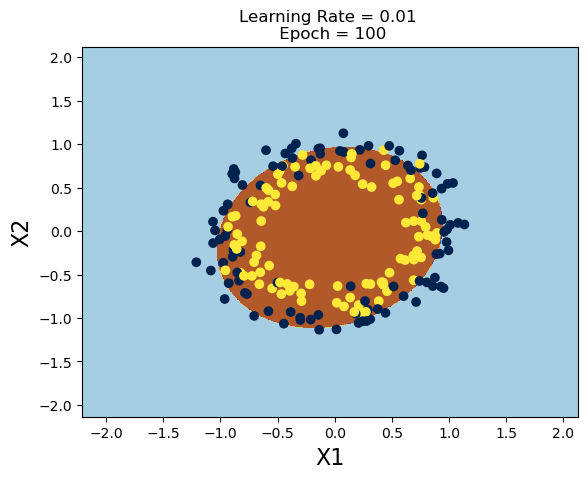

In [213]:
# make_circlesのデータセットを用いた描画

from sklearn.datasets import make_circles

n_samp = 200
X, y = make_circles(n_samples=n_samp, noise=0.1)

learning_rate = 0.01
epoch = 100
model = Perceptron_Quadratic_Classifier(learning_rate, epoch)
model.fit(X, y)

plot_decision_boundary(X, model, learning_rate, epoch)

In [214]:
# パーセプトロンを用いた3次の識別関数の学習


# 3次の特徴量
def make_cube_features(X):
    Xp = np.hstack([X[:, 0:1], X[:, 1:2]])
    Xp = np.hstack([Xp, X[:, 0:1] * X[:, 1:2]])
    Xp = np.hstack([Xp, X[:, 0:1] ** 2])
    Xp = np.hstack([Xp, X[:, 1:2] ** 2])
    Xp = np.hstack([Xp, X[:, 0:1] ** 2 * X[:, 1:2]])
    Xp = np.hstack([Xp, X[:, 0:1] * X[:, 1:2] ** 2])
    Xp = np.hstack([Xp, X[:, 0:1] ** 3])
    Xp = np.hstack([Xp, X[:, 1:2] ** 3])
    return Xp


# クラスの定義
class Perceptron_Cubic_Classifier:
    def __init__(self, learning_rate, epoch):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        Xp = make_cube_features(X)
        n_samples, n_features = Xp.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epoch):
            errors = 0
            for i in range(n_samples):
                output = np.dot(Xp[i], self.weights) + self.bias
                y_pred = np.where(output > 0, 1, 0)

                if y_pred != y[i]:
                    errors += 1
                    self.weights += self.learning_rate * (y[i] - y_pred) * Xp[i]
                    self.bias += self.learning_rate * (y[i] - y_pred)

            if errors == 0:
                break

    def predict(self, X):
        Xp = make_cube_features(X)
        output = np.dot(Xp, self.weights) + self.bias
        y_pred = np.where(output >= 0, 1, 0)
        return y_pred

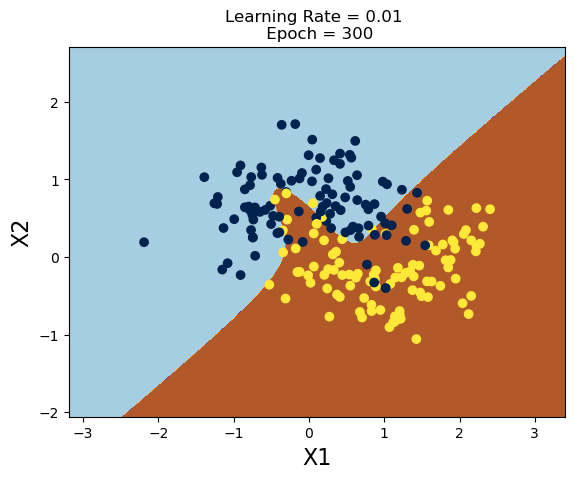

In [215]:
# make_moonsのデータセットを用いた描画

from sklearn.datasets import make_moons

n_samp = 200
X, y = make_moons(n_samples=n_samp, noise=0.3)

learning_rate = 0.01
epoch = 300
model = Perceptron_Cubic_Classifier(learning_rate, epoch)
model.fit(X, y)

plot_decision_boundary(X, model, learning_rate, epoch)